In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/My Drive/BTL2_DL/data.csv')
df.head()

,content,score
0,giao hàng mẹ gì gọi thì k nhấc máy r tự_ý_hủy ...,1
1,ứng_dụng tệ nhất thế_giới làm_ăn toàn lừa nhau...,1
2,đề_nghị lazada thêm tính_năng_hủy đơn hàng khẩ...,1
3,lazada chơi mất_dạy đơn đặt nhiệm_vụ lazreward...,1
4,làm event đặt 5 món trên 30k nhậ 80 laz reward...,1


In [4]:
df['label'] = df['score'].apply(lambda x: 1 if x >= 4 else 0)
df.head()

,content,score,label
0,giao hàng mẹ gì gọi thì k nhấc máy r tự_ý_hủy ...,1,0
1,ứng_dụng tệ nhất thế_giới làm_ăn toàn lừa nhau...,1,0
2,đề_nghị lazada thêm tính_năng_hủy đơn hàng khẩ...,1,0
3,lazada chơi mất_dạy đơn đặt nhiệm_vụ lazreward...,1,0
4,làm event đặt 5 món trên 30k nhậ 80 laz reward...,1,0


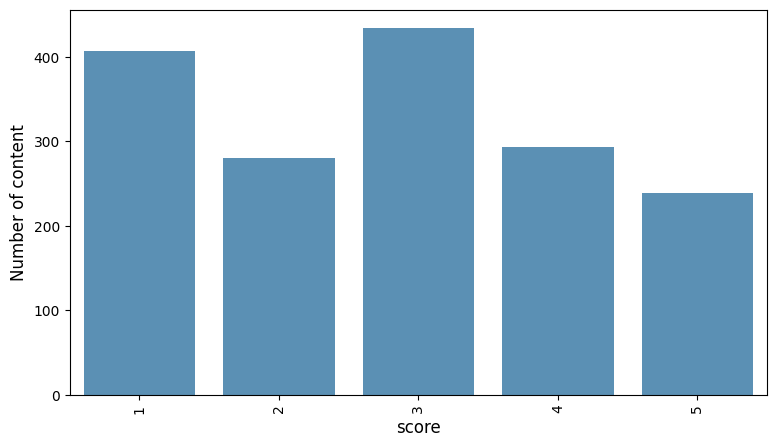

In [5]:
# Đếm số lượng nội dung theo điểm số
cnt_pro = df['score'].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(9,5))
sns.barplot(x=cnt_pro.index, y=cnt_pro.values, alpha=0.8)
plt.ylabel('Number of content', fontsize=12)
plt.xlabel('score', fontsize=12)
plt.xticks(rotation=90)
plt.show()

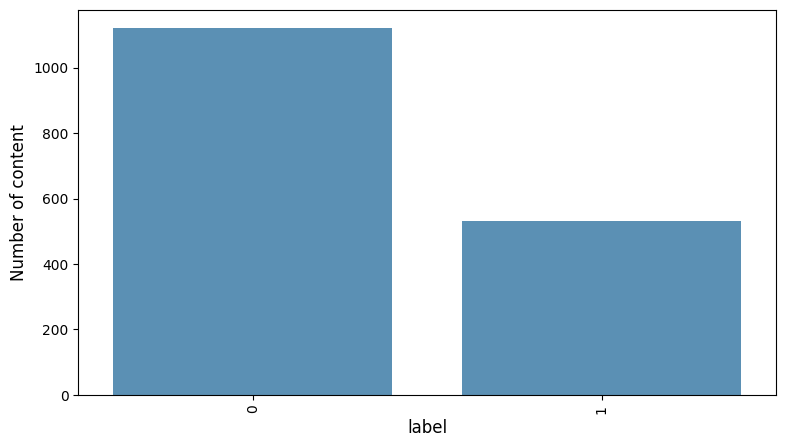

In [6]:
# Đếm số lượng nội dung theo label
cnt_pro = df['label'].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(9,5))
sns.barplot(x=cnt_pro.index, y=cnt_pro.values, alpha=0.8)
plt.ylabel('Number of content', fontsize=12)
plt.xlabel('label', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [7]:
def print_message(index):
    example = df[df.index == index][['content', 'label']].values[0]
    if len(example) > 0:
        print(example[0])
        print('label:', example[1])
print_message(200)

ko đăng_nhập được mua thì kêu thanh_toán bằng thẻ thường thường mua thanh_toán bằng tiền_mặt mà ta nói ha chưa bao_giờ t dùng app nào mà dở như app này nhấn_mạnh chữ chê và chê
label: 0


In [8]:
print_message(0)

giao hàng mẹ gì gọi thì k nhấc máy r tự_ý_hủy đơn hàng thề chứ phục_vụ như cl đặt_hàng thanh_toán xong hết mà còn gặp tình_trạng thế bực cả mình
label: 0


In [9]:
df.shape

(1653, 3)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1653 entries, 0 to 1652
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  1646 non-null   object
 1   score    1653 non-null   int64 
 2   label    1653 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 38.9+ KB


In [11]:
df['label'].value_counts(normalize=True)

0    0.678161
1    0.321839
Name: label, dtype: float64

In [12]:
pip install underthesea

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 45.9 MB/s eta 0:00:00


In [ ]:
import urllib.request
# URL của danh sách stopwords tiếng Việt của dự án underthesea
url = "https://github.com/undertheseanlp/underthesea/blob/main/underthesea/datasets/stopwords/stopwords.txt"

# Đường dẫn đến thư mục bạn muốn lưu trữ
output_path = "/kaggle/working/stopword.txt"

# Tải dữ liệu từ URL và lưu vào đường dẫn cụ thể
urllib.request.urlretrieve(url, output_path)

print("Dữ liệu đã được tải và lưu vào:", output_path)

In [ ]:
def remove_stopwords(text, stopwords_path):
    with open(stopwords_path, 'r', encoding='utf-8') as file:
        stopwords = [line.strip() for line in file]

    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords]

    return ' '.join(filtered_words)

In [13]:
# Hàm tạo từ điển và vector hóa từ
def tokenize_and_vectorize(texts):
    vectorizer = CountVectorizer()
    vectorizer.fit(texts)
    vocab = vectorizer.vocabulary_
    # Vector hóa từ
    vectors = [vectorizer.transform([text]).toarray()[0] for text in texts]
    return vocab, vectors

In [17]:
def remove_stopwords(text, stopwords_path):
    # Kiểm tra xem giá trị có phải là NaN không
    if isinstance(text, str):  # Nếu giá trị là một chuỗi
        with open(stopwords_path, 'r', encoding='utf-8') as file:
            stopwords = [line.strip() for line in file]

        words = text.split()
        filtered_words = [word for word in words if word.lower() not in stopwords]

        return ' '.join(filtered_words)
    else:
        return text  # Trả về giá trị gốc nếu không phải là chuỗi

# Đường dẫn tới tệp tin stopwords.txt đã tải về
stopwords_path = "/content/drive/MyDrive/BTL2_DL/underthesea/stopword.txt"

# Áp dụng hàm remove_stopwords cho cột 'content'
df['content'] = df['content'].apply(lambda x: remove_stopwords(x, stopwords_path))

# In ra 5 dòng đầu của DataFrame sau khi loại bỏ stopwords
print(df.head())

                                             content  score  label
0  giao hàng mẹ gọi k nhấc máy r tự_ý_hủy đơn hàn...      1      0
1  ứng_dụng tệ nhất thế_giới làm_ăn toàn lừa nhau...      1      0
2  đề_nghị lazada thêm tính_năng_hủy đơn hàng khẩ...      1      0
3  lazada chơi mất_dạy đơn đặt nhiệm_vụ lazreward...      1      0
4  làm event đặt 5 món 30k nhậ 80 laz reward hàng...      1      0


In [18]:
import pandas as pd
import numpy as np
import string
import re
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
import urllib.request
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [19]:
# Dữ liệu văn bản và nhãn tương ứng
texts = df['content'].astype(str).tolist()
labels = df['label'].astype(int).tolist()

In [20]:
print(texts)

['giao hàng mẹ gọi k nhấc máy r tự_ý_hủy đơn hàng thề phục_vụ cl đặt_hàng thanh_toán xong hết còn gặp tình_trạng thế bực mình', 'ứng_dụng tệ nhất thế_giới làm_ăn toàn lừa nhau nhà bán hàng đến chủ kênh', 'đề_nghị lazada thêm tính_năng_hủy đơn hàng khẩn_cấp app trong tình_trạng đơn hàng đường vận_chuyển lý_do thời_gian giao hàng sai thông_tin đặt_hàng ban_đầu đơn hàng giao nhanh 24h tới ngày nhận giao mà_lại hẹn 3 ngày mới giao thực_tế quá vô_lý', 'lazada chơi mất_dạy đơn đặt nhiệm_vụ lazreward chờ giao hàng ngày_mai mất tính_năng thấy luôn coi mua lazreward nhận treo đầu dê bán thịt chó à chơi thế ai chơi', 'làm event đặt 5 món 30k nhậ 80 laz reward hàng về hết lain xóa_event đi bảo k ảnh k xử_lý app k xứng 1s âm sao', 'trò_chơi ko công_bằng luật một đằng tham_gia thành_công cộng 1 nẻo', 'lazada thanh_toán bằng mã qr smartbanking ngân_hàng hoàn tiền hoàn tài_khoản ngân_hàng đăng_ký hình_thức thanh_toán online khác rắc_rối kém bảo_mật mua hàng lazada mình thử thanh_toán bằng zalo bay mì

In [21]:
# Khởi tạo Tokenizer và tạo từ điển từ dữ liệu văn bản
# tokenizer = Tokenizer()
# def create_tokenizer(texts):
#     tokenizer = Tokenizer()
#     for text in texts:
#         tokenized_text = ViTokenizer.tokenize(text)
#         tokenizer.fit_on_texts([tokenized_text])
#     return tokenizer
# tokenizer = create_tokenizer(texts)
# Khởi tạo Tokenizer và tạo từ điển từ dữ liệu văn bản
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(texts)

# Khởi tạo Tokenizer và tạo từ điển từ dữ liệu văn bản đã xử lý
tokenizer = Tokenizer(filters=" ") #filters chỉ loại bỏ khoảng trắng
tokenizer.fit_on_texts(texts)

# In từ điển
word_index = tokenizer.word_index
print(word_index)


{'hàng': 1, 'mua': 2, 'ko': 3, 'lazada': 4, 'giao': 5, 'tiền': 6, 'quá': 7, 'tôi': 8, 'đc': 9, 'shop': 10, 'app': 11, 'tốt': 12, 'bán': 13, 'người': 14, 'đơn': 15, 'lỗi': 16, 'sao': 17, '1': 18, 'ship': 19, 'nhận': 20, 'k': 21, 'còn': 22, 'mình': 23, 'đặt': 24, 'hơn': 25, 'thanh_toán': 26, 'tệ': 27, 'ok': 28, 'thấy': 29, 'trả': 30, 'đặt_hàng': 31, 'lần': 32, 'sản_phẩm': 33, 'quảng_cáo': 34, 'dùng': 35, 'giá': 36, 'hoàn': 37, 'toàn': 38, 'mới': 39, 'mã': 40, 'trong': 41, 'ngày': 42, 'khách_hàng': 43, 'voucher': 44, 'đúng': 45, 'về': 46, 'làm': 47, 'hết': 48, 'luôn': 49, 'lâu': 50, 'lừa_đảo': 51, 'tải': 52, 'đến': 53, 'đi': 54, '3': 55, 'bên': 56, 'shopee': 57, 'giảm_giá': 58, 'cao': 59, 'mất': 60, 'khác': 61, 'phí': 62, 'chất_lượng': 63, 'ứng_dụng': 64, 'nhanh': 65, 'ở': 66, 'nó': 67, 'rẻ': 68, 'lắm': 69, 'mấy': 70, 'bằng': 71, '2': 72, 'tui': 73, 'nói': 74, 'biết': 75, 'xong': 76, 'vận_chuyển': 77, 'nào': 78, 'đồ': 79, 'l': 80, 'hay': 81, 'sử_dụng': 82, 'hơi': 83, 'thời_gian': 84, 'thô

In [22]:
# Chuyển đổi văn bản thành chuỗi số sử dụng từ điển đã tạo
sequences = tokenizer.texts_to_sequences(texts)
print("Chuỗi số tương ứng:")
for seq in sequences:
    print(seq)

Chuỗi số tương ứng:
[5, 1, 270, 108, 21, 1366, 182, 118, 1367, 15, 1, 934, 351, 607, 31, 26, 76, 48, 22, 200, 322, 291, 292, 23]
[64, 27, 192, 1368, 119, 38, 135, 323, 89, 13, 1, 53, 608, 719]
[212, 4, 140, 1369, 15, 1, 1370, 11, 41, 322, 15, 1, 935, 77, 352, 84, 5, 1, 120, 353, 31, 936, 15, 1, 5, 65, 937, 136, 42, 20, 5, 511, 324, 55, 42, 39, 5, 293, 7, 451]
[4, 141, 512, 15, 24, 1371, 938, 172, 5, 1, 1372, 60, 294, 29, 49, 245, 2, 938, 20, 227, 130, 271, 13, 295, 228, 150, 141, 291, 131, 141]
[47, 1373, 24, 124, 94, 388, 1374, 1375, 151, 1376, 1, 46, 48, 1377, 1378, 54, 132, 21, 296, 21, 272, 11, 21, 939, 940, 941, 17]
[513, 3, 942, 1379, 96, 514, 1380, 452, 515, 18, 609]
[4, 26, 71, 40, 1381, 943, 273, 37, 6, 37, 121, 273, 516, 720, 26, 389, 61, 944, 90, 721, 2, 1, 4, 23, 158, 26, 71, 517, 518, 23, 152, 6, 41, 121, 273, 96, 173, 78, 943, 26, 81]
[64, 27, 1382, 1383, 8, 1384, 212, 1385, 722, 1386, 66, 274, 111]
[51, 1387, 91, 142, 14, 5, 1, 125, 2, 72, 5, 18, 95, 29, 125, 133, 20, 51

In [23]:
# Tìm độ dài tối đa của văn bản
max_length = max([len(seq) for seq in sequences])

# Padding chuỗi số để có độ dài như nhau
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Độ dài của từ vựng
vocab_size = len(tokenizer.word_index) + 1

# In ra độ dài tối đa của văn bản
print("Độ dài tối đa của văn bản trong dữ liệu:", max_length)
# In ra ví dụ một mẫu dữ liệu
print("Văn bản ban đầu:", texts[0])
print("Chuỗi số tương ứng:", sequences[0])
print("Chuỗi số sau khi được padding:", padded_sequences[0])
print("Nhãn tương ứng:", labels[0])

Độ dài tối đa của văn bản trong dữ liệu: 95
Văn bản ban đầu: giao hàng mẹ gọi k nhấc máy r tự_ý_hủy đơn hàng thề phục_vụ cl đặt_hàng thanh_toán xong hết còn gặp tình_trạng thế bực mình
Chuỗi số tương ứng: [5, 1, 270, 108, 21, 1366, 182, 118, 1367, 15, 1, 934, 351, 607, 31, 26, 76, 48, 22, 200, 322, 291, 292, 23]
Chuỗi số sau khi được padding: [   5    1  270  108   21 1366  182  118 1367   15    1  934  351  607
   31   26   76   48   22  200  322  291  292   23    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0]
Nhãn tương ứng: 0


In [24]:
print("Chuỗi số sau khi được padding:", padded_sequences)

Chuỗi số sau khi được padding: [[   5    1  270 ...    0    0    0]
 [  64   27  192 ...    0    0    0]
 [ 212    4  140 ...    0    0    0]
 ...
 [ 696 3099  258 ...    0    0    0]
 [3100 1139    0 ...    0    0    0]
 [ 189 3101  115 ...    0    0    0]]


In [25]:
pip install transformers

In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel

# Tạo tokenizer và mô hình PhoBERT
tokenizer = BertTokenizer.from_pretrained("vinai/phobert-base")
model = TFBertModel.from_pretrained("vinai/phobert-base")

# Chuyển đổi danh sách padded_sequences thành tensor
input_ids = tf.constant(padded_sequences)

# Nhúng văn bản bằng mô hình PhoBERT
outputs = model(input_ids)

# Lấy vector embedding của văn bản
embeddings = outputs.last_hidden_state

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.txt:   0%|          | 0.00/895k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'PhobertTokenizer'. 
The class this function is called from is 'BertTokenizer'.
You are using a model of type roberta to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.


tf_model.h5:   0%|          | 0.00/740M [00:00<?, ?B/s]

Some layers from the model checkpoint at vinai/phobert-base were not used when initializing TFBertModel: ['roberta', 'lm_head']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertModel were not initialized from the model checkpoint at vinai/phobert-base and are newly initialized: ['bert']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [40]:
print(embeddings)

tf.Tensor(
[[[-1.558705   -1.3757623  -0.0671073  ...  0.50077266 -0.9395087
    1.3967767 ]
  [-2.4828515  -0.32324436 -0.11913215 ... -0.49591368 -2.480498
    1.4152912 ]
  [-1.3157725  -0.7044727  -0.0484142  ...  0.2965262  -1.8072217
   -0.31776607]
  ...
  [-1.5869621   0.11299442  0.75451714 ... -0.47446665 -2.082746
   -0.01082094]
  [-1.5028312   0.3806327   0.14198731 ... -0.5362833  -2.4113345
    0.81846863]
  [-1.1155789  -0.4781618   0.9927148  ...  0.23918617 -2.0526242
    0.25483844]]

 [[-1.8699782  -1.3483872   1.5030491  ... -0.25282323 -1.355373
    0.1281431 ]
  [-2.3009496   0.6418772  -0.238137   ... -0.16507873 -1.7792143
    0.9357501 ]
  [-1.5264468  -0.98203796  0.19946343 ... -0.72480196 -1.5339862
    1.224582  ]
  ...
  [-1.5915854   0.07807875  0.7079347  ... -0.4989305  -2.1094923
    0.01404605]
  [-1.5244294   0.3448957   0.11676532 ... -0.58875614 -2.4556282
    0.79756325]
  [-1.1453073  -0.5014915   0.94962585 ...  0.18424633 -2.094318
    0.25969

In [39]:
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(embeddings.numpy(), labels, test_size=0.2, random_state=42)

# Chuyển đổi danh sách nhãn thành mảng NumPy
y_train = np.array(y_train)
y_test = np.array(y_test)

# In ra kích thước của tập huấn luyện và tập kiểm tra
print("Kích thước của tập huấn luyện:", len(X_train))
print("Kích thước của tập kiểm tra:", len(X_test))

Kích thước của tập huấn luyện: 1322
Kích thước của tập kiểm tra: 331


In [41]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization

# Khởi tạo mô hình
model = Sequential()

# Thêm lớp LSTM đầu tiên với units=128 và input_shape=(X_train.shape[1], X_train.shape[2])
model.add(LSTM(units=128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))

# Thêm lớp Dropout để tránh overfitting
model.add(Dropout(0.2))

# Thêm lớp LSTM thứ hai với units=64
model.add(LSTM(units=64, return_sequences=True))

# Thêm lớp Dropout khác
model.add(Dropout(0.2))

# Thêm lớp LSTM thứ ba với units=32
model.add(LSTM(units=32))

# Thêm lớp Dense với 16 units và activation là 'relu'
model.add(Dense(16, activation='relu'))

# Thêm lớp BatchNormalization để cải thiện tốc độ hội tụ và giảm vanishing gradient
model.add(BatchNormalization())

# Thêm lớp Dropout nữa để tránh overfitting
model.add(Dropout(0.5))

# Thêm lớp Dense cuối cùng với activation là 'sigmoid'
model.add(Dense(1, activation='sigmoid'))

In [42]:
from tensorflow.keras.optimizers import Adam

# Biên dịch mô hình
model.compile(optimizer=Adam(learning_rate=0.005), loss='binary_crossentropy', metrics=['accuracy'])


In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 95, 128)           459264    
                                                                 
 dropout_3 (Dropout)         (None, 95, 128)           0         
                                                                 
 lstm_4 (LSTM)               (None, 95, 64)            49408     
                                                                 
 dropout_4 (Dropout)         (None, 95, 64)            0         
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_1 (Bat  (None, 16)               

In [44]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience= 40, restore_best_weights=True, verbose=1)

In [45]:
# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test), callbacks=[reduce_lr, early_stopping])

Epoch 1/15
42/42 [==============================] - 21s 391ms/step - loss: 0.7087 - accuracy: 0.5900 - val_loss: 0.6213 - val_accuracy: 0.7039 - lr: 0.0050
Epoch 2/15
42/42 [==============================] - 17s 410ms/step - loss: 0.6558 - accuracy: 0.6581 - val_loss: 0.6128 - val_accuracy: 0.7039 - lr: 0.0050
Epoch 3/15
42/42 [==============================] - 28s 677ms/step - loss: 0.6449 - accuracy: 0.6687 - val_loss: 0.6131 - val_accuracy: 0.7039 - lr: 0.0050
Epoch 4/15
42/42 [==============================] - 15s 364ms/step - loss: 0.6356 - accuracy: 0.6747 - val_loss: 0.6101 - val_accuracy: 0.7039 - lr: 0.0050
Epoch 5/15
42/42 [==============================] - 16s 374ms/step - loss: 0.6391 - accuracy: 0.6725 - val_loss: 0.6122 - val_accuracy: 0.7039 - lr: 0.0050
Epoch 6/15
42/42 [==============================] - 15s 366ms/step - loss: 0.6403 - accuracy: 0.6717 - val_loss: 0.6179 - val_accuracy: 0.7039 - lr: 0.0050
Epoch 7/15
42/42 [==============================] - 17s 397ms/st

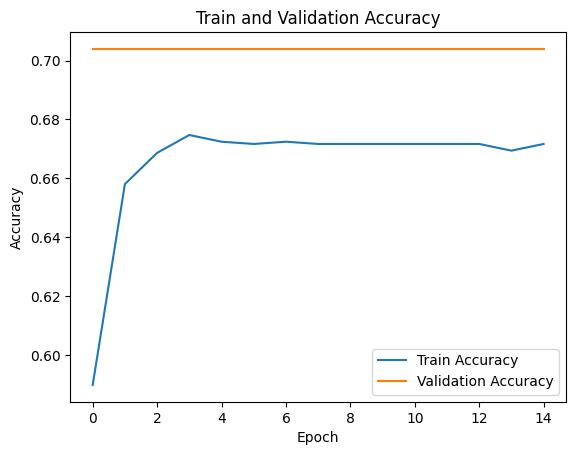

In [46]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

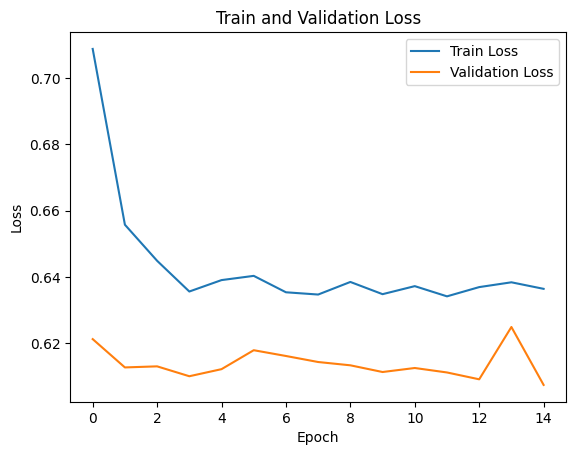

In [47]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [48]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

11/11 [==============================] - 2s 157ms/step - loss: 0.6075 - accuracy: 0.7039
Test accuracy: 0.7039275169372559


In [49]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
print(y_pred)


11/11 [==============================] - 1s 71ms/step
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 

In [50]:
print(y_test)

[0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0
 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1
 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1
 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 1]
